<a href="https://colab.research.google.com/github/babytwo133-source/NguyenTranVanAn_cuoiky/blob/main/cuoiki_phan2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Đã import thư viện.
🔽 Tải ảnh từ URL: https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg
✅ Tải ảnh thành công: input_image.jpg

🔽 Đang tải mô hình YOLOv8n...
✅ Tải mô hình thành công!
🔍 Bắt đầu nhận dạng đối tượng...

0: 384x640 2 persons, 1 tie, 357.4ms
Speed: 22.6ms preprocess, 357.4ms inference, 36.6ms postprocess per image at shape (1, 3, 384, 640)
✅ Nhận dạng hoàn tất!


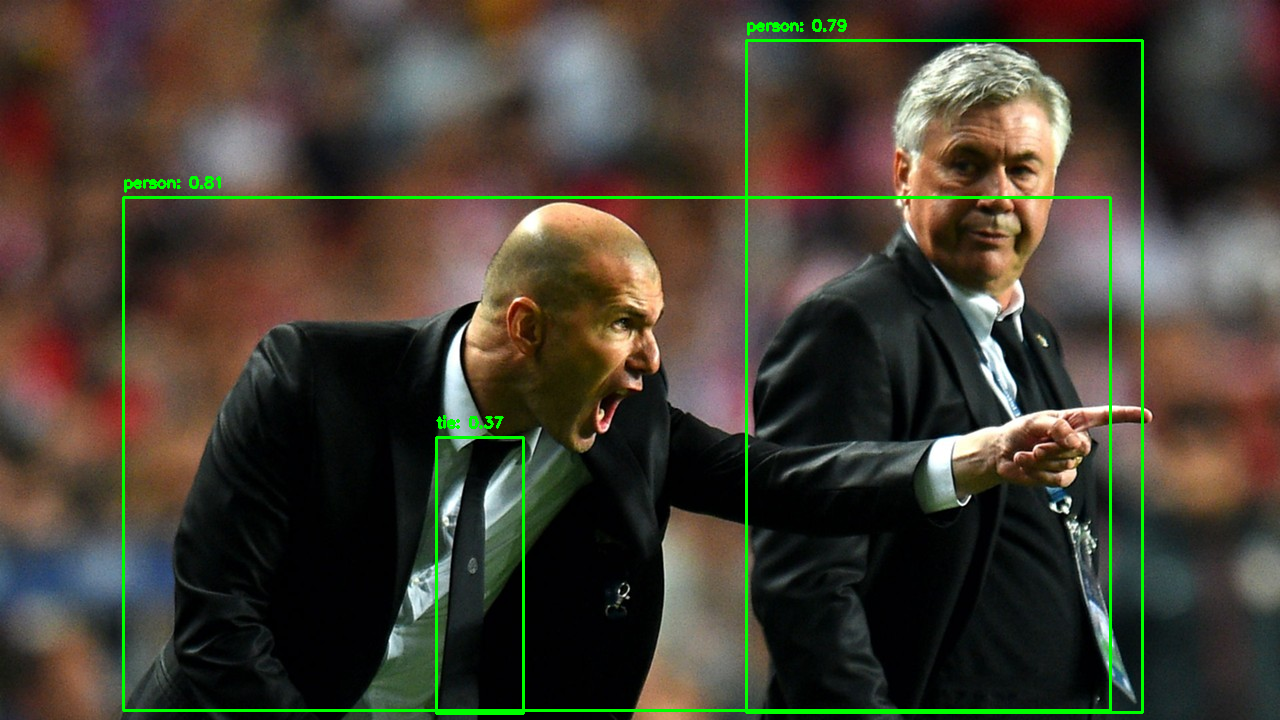

📋 Bảng 1: Chi tiết các đối tượng phát hiện


,ID,Đối tượng,Độ tin cậy,Tọa độ,Diện tích (px)
0,1,person,0.81,"[123, 197, 1110, 710]",506331
1,2,person,0.79,"[746, 40, 1142, 712]",266112
2,3,tie,0.37,"[436, 437, 523, 713]",24012


📊 Thống kê đối tượng:
- person: 2
- tie: 1


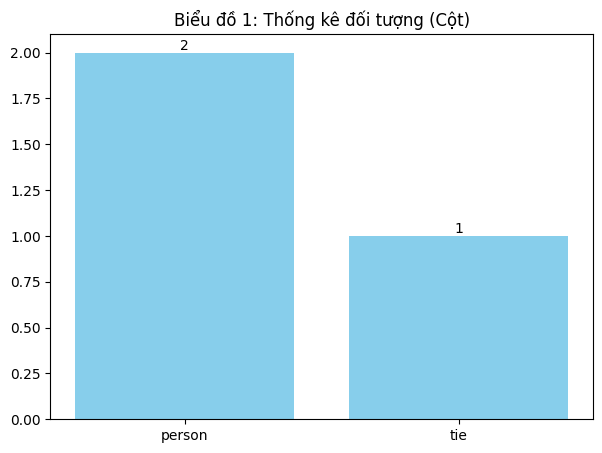

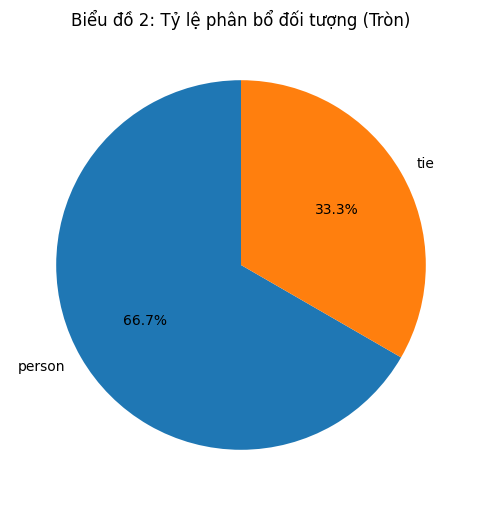

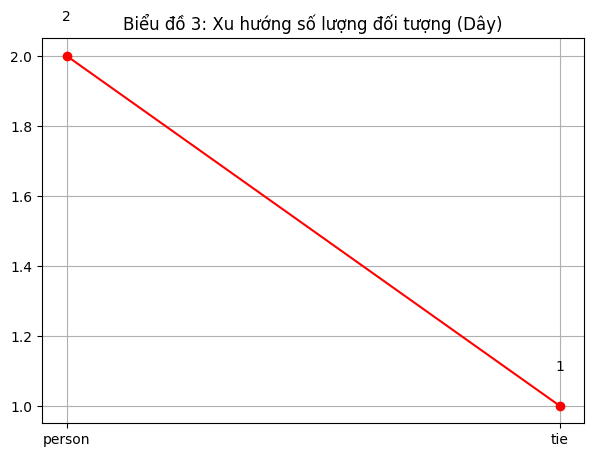

🔽 Đang tải mô hình segmentation YOLOv8n-seg...
✅ Segmentation model tải thành công!

0: 384x640 2 persons, 2 ties, 284.9ms
Speed: 10.4ms preprocess, 284.9ms inference, 12.9ms postprocess per image at shape (1, 3, 384, 640)
🖼️ Kết quả phân đoạn đối tượng:


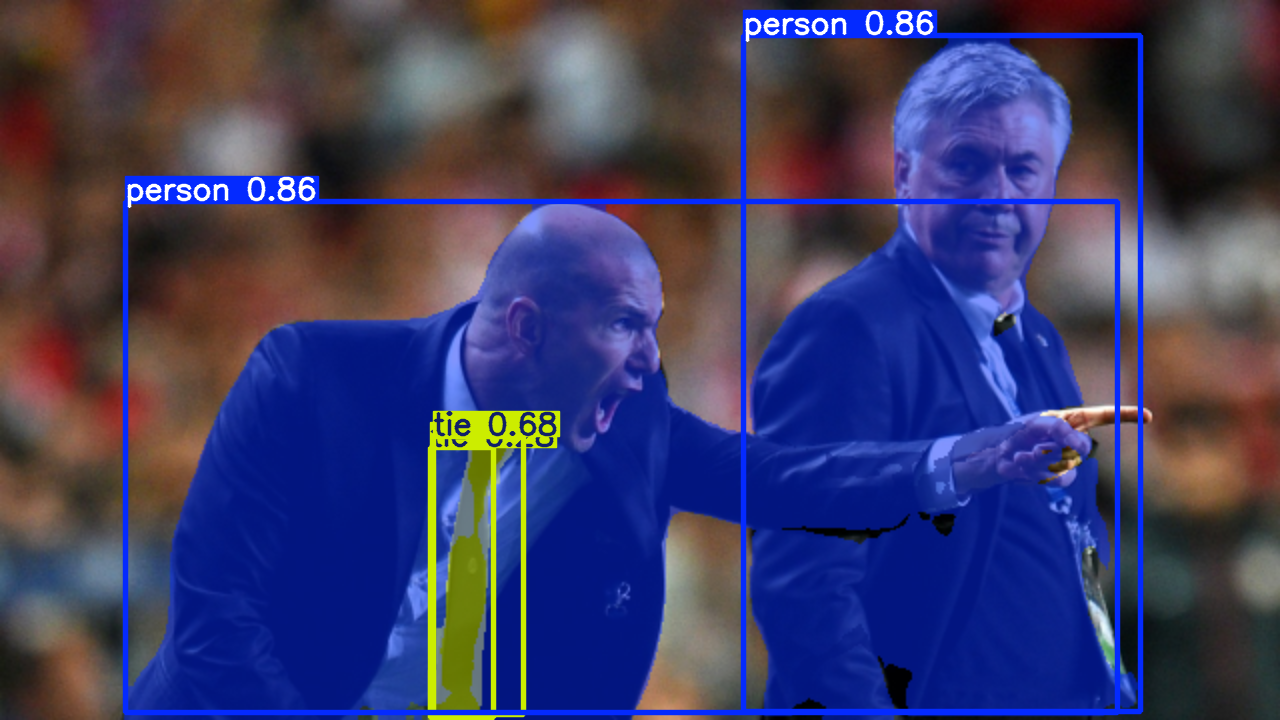

In [ ]:
# =================================================================
# PIPELINE HOÀN CHỈNH YOLOv8: OBJECT DETECTION & SEGMENTATION
# =================================================================

# ===========================
# BƯỚC 1: CÀI ĐẶT THƯ VIỆN
# ===========================
!pip install ultralytics matplotlib pandas

# ===========================
# BƯỚC 2: IMPORT CÁC THƯ VIỆN
# ===========================
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from collections import Counter
import pandas as pd
from google.colab.patches import cv2_imshow
import os

print("✅ Đã import thư viện.")

# ===========================
# BƯỚC 3: TẢI MÔ HÌNH + ẢNH DEMO
# ===========================
image_url = "https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg"
image_path = "input_image.jpg"

print(f"🔽 Tải ảnh từ URL: {image_url}")
!wget -q -O {image_path} "{image_url}"

if os.path.exists(image_path) and os.path.getsize(image_path) > 0:
    print("✅ Tải ảnh thành công:", image_path)
else:
    print("❌ LỖI: Tải ảnh thất bại.")

print("\n🔽 Đang tải mô hình YOLOv8n...")
model = YOLO("yolov8n.pt")
print("✅ Tải mô hình thành công!")

# ===========================
# BƯỚC 4: NHẬN DẠNG ĐỐI TƯỢNG
# ===========================
img = cv2.imread(image_path)

if img is None:
    print("❌ LỖI: Không đọc được ảnh.")
else:
    print("🔍 Bắt đầu nhận dạng đối tượng...")
    results = model(img)
    result = results[0]
    detected_objects = []

    for box in result.boxes:
        class_id = int(box.cls[0].item())
        class_name = model.names[class_id]
        detected_objects.append(class_name)

        x1, y1, x2, y2 = [int(i) for i in box.xyxy[0]]
        conf = box.conf[0].item()
        label = f"{class_name}: {conf:.2f}"

        cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)
        cv2.putText(img, label, (x1,y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 2)

    print("✅ Nhận dạng hoàn tất!")
    cv2_imshow(img)

# ===========================
# BƯỚC 4.5: PHÂN TÍCH CHI TIẾT
# ===========================
if 'result' in locals() and len(result.boxes) > 0:
    detection_data = []
    for i, box in enumerate(result.boxes):
        class_id = int(box.cls[0].item())
        class_name = model.names[class_id]
        conf = box.conf[0].item()
        x1, y1, x2, y2 = [int(coord) for coord in box.xyxy[0]]
        area = (x2-x1)*(y2-y1)

        detection_data.append({
            "ID": i+1,
            "Đối tượng": class_name,
            "Độ tin cậy": f"{conf:.2f}",
            "Tọa độ": f"[{x1}, {y1}, {x2}, {y2}]",
            "Diện tích (px)": area
        })

    df_results = pd.DataFrame(detection_data)
    print("📋 Bảng 1: Chi tiết các đối tượng phát hiện")
    display(df_results)

# ===========================
# BƯỚC 5: THỐNG KÊ & BIỂU ĐỒ
# ===========================
if detected_objects:
    counts = Counter(detected_objects)
    labels = list(counts.keys())
    values = list(counts.values())

    print("📊 Thống kê đối tượng:")
    for obj, num in counts.items():
        print(f"- {obj}: {num}")

    # Biểu đồ cột
    plt.figure(figsize=(7,5))
    bars = plt.bar(labels, values, color="skyblue")
    plt.title("Biểu đồ 1: Thống kê đối tượng (Cột)")
    for bar in bars:
        y = bar.get_height()
        plt.text(bar.get_x()+bar.get_width()/2.0, y, int(y), ha="center", va="bottom")
    plt.show()

    # Biểu đồ tròn
    plt.figure(figsize=(6,6))
    plt.pie(values, labels=labels, autopct="%1.1f%%", startangle=90)
    plt.title("Biểu đồ 2: Tỷ lệ phân bổ đối tượng (Tròn)")
    plt.show()

    # Biểu đồ dây
    plt.figure(figsize=(7,5))
    plt.plot(labels, values, marker="o", linestyle="-", color="red")
    plt.title("Biểu đồ 3: Xu hướng số lượng đối tượng (Dây)")
    plt.grid(True)
    for i, v in enumerate(values):
        plt.text(i, v+0.1, str(v), ha="center")
    plt.show()

# ===========================
# BƯỚC 6: PHÂN ĐOẠN (SEGMENTATION)
# ===========================
print("🔽 Đang tải mô hình segmentation YOLOv8n-seg...")
seg_model = YOLO("yolov8n-seg.pt")
print("✅ Segmentation model tải thành công!")

img_seg = cv2.imread(image_path)
if img_seg is not None:
    seg_results = seg_model(img_seg)
    annotated_seg = seg_results[0].plot()
    print("🖼️ Kết quả phân đoạn đối tượng:")
    cv2_imshow(annotated_seg)
else:
    print("❌ Không thể đọc lại ảnh để segmentation.")
